# Implementing interpolation and extrapolation in R

### Install packages

In [1]:
install.packages('ggplot2')

install.packages('polynom')

also installing the dependencies ‘pkgload’, ‘rlang’, ‘testthat’, ‘isoband’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Load packages

In [48]:
library(polynom)
library(ggplot2)

options(repr.plot.width = 8, repr.plot.height = 5)

### Take coordinates of points to represent on graph
Note:- Here, x1 = 2, y1 = 2, and x2 = 6, y2 = 12 as shown below dataframe.

In [49]:
x <- c(2, 6)

y <- c(2, 12)

In [50]:
two_points <- data.frame(x, y)
two_points

x,y
2,2
6,12


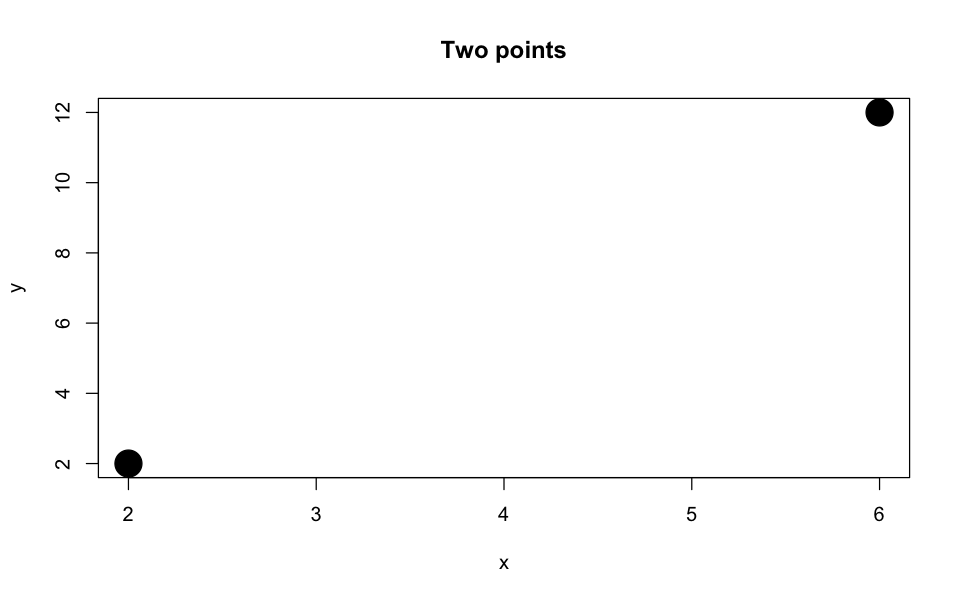

In [51]:
plot(x, y, pch = 19, cex = 3, main = 'Two points')

### Interpolation

https://en.wikipedia.org/wiki/Linear_interpolation

https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/approxfun

Interpolation:- It  is  a  method  to  find  the  value  between  the known data points. For example  if we have two known data points (x0,y0) and (x1,y1) and we want to estimate any value of x for given value of y somewhat in-between these two data points.

__approxfun() returns a function that does the interpolation, whilst approx() returns the interpolated values directly.__

__Note:-__`approx` function is used to find data points between given coordinate of `(x, y)`, which is used for interpolation.

http://dwoll.de/rexrepos/posts/diagSplines.html#linear-interpolation



### interpolation for linear method

In [52]:
interp_pts_linear <- approx(x, y, method = 'linear', n = 20)

interp_pts_linear$x

[1] 2.000000 2.210526 2.421053 2.631579 2.842105 3.052632 3.263158 3.473684
 [9] 3.684211 3.894737 4.105263 4.315789 4.526316 4.736842 4.947368 5.157895
[17] 5.368421 5.578947 5.789474 6.000000

In [53]:
interp_pts_linear$y

[1]  2.000000  2.526316  3.052632  3.578947  4.105263  4.631579  5.157895
 [8]  5.684211  6.210526  6.736842  7.263158  7.789474  8.315789  8.842105
[15]  9.368421  9.894737 10.421053 10.947368 11.473684 12.000000

In [54]:
interp_data_points <- data.frame(cbind(interp_pts_linear$x, interp_pts_linear$y))

colnames(interp_data_points) <- c('x_i', 'y_i')

In [55]:
interp_data_points

x_i,y_i
2.000000,2.000000
2.210526,2.526316
2.421053,3.052632
2.631579,3.578947
2.842105,4.105263
3.052632,4.631579
3.263158,5.157895
3.473684,5.684211
3.684211,6.210526
3.894737,6.736842


### Interpolation representation by using all points between known points `(x0, y0) and (x1, y1)` as a doted line, method is linear.

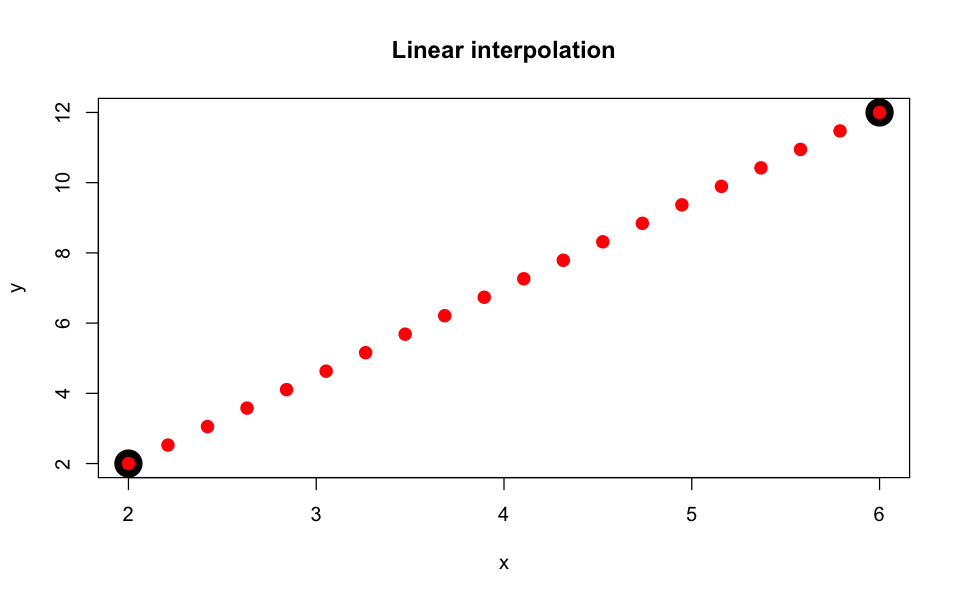

In [56]:
plot(x, y, pch = 19, cex = 3, main = 'Linear interpolation')

points(interp_pts_linear, pch = 16, cex = 1.5,  col = 'red' )

### Interpolation for constant

In [57]:
interp_pts_constant <- approx(x, y, method = 'constant', n = 20)

interp_pts_constant$x

[1] 2.000000 2.210526 2.421053 2.631579 2.842105 3.052632 3.263158 3.473684
 [9] 3.684211 3.894737 4.105263 4.315789 4.526316 4.736842 4.947368 5.157895
[17] 5.368421 5.578947 5.789474 6.000000

In [58]:
interp_pts_constant$y

[1]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 12

### interpolation points (i.e points between `x0`, `y0` and `x1`, `y1`) into datafram

In [60]:
interp_data_points <- data.frame(cbind(interp_pts_constant$x, interp_pts_constant$y))

colnames(interp_data_points) <- c('x_i', 'y_i')

interp_data_points

x_i,y_i
2.000000,2
2.210526,2
2.421053,2
2.631579,2
2.842105,2
3.052632,2
3.263158,2
3.473684,2
3.684211,2
3.894737,2


### Interpolation representation by using all points between known points `(x0, y0) and (x1, y1)` as a doted line, method is constant.

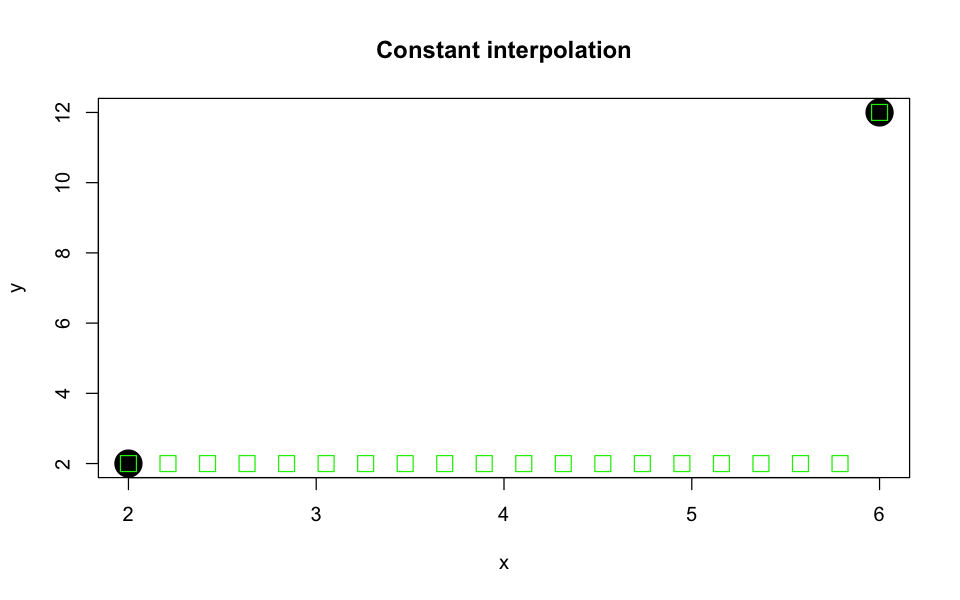

In [61]:
plot(x, y, pch = 19, cex = 3, main = 'Constant interpolation')

points(interp_pts_constant, col = 'green2', pch = 22, cex = 2)

### Interpolation representation by using all points between known points `(x0, y0) and (x1, y1)` and both method `linear` and `constant`.

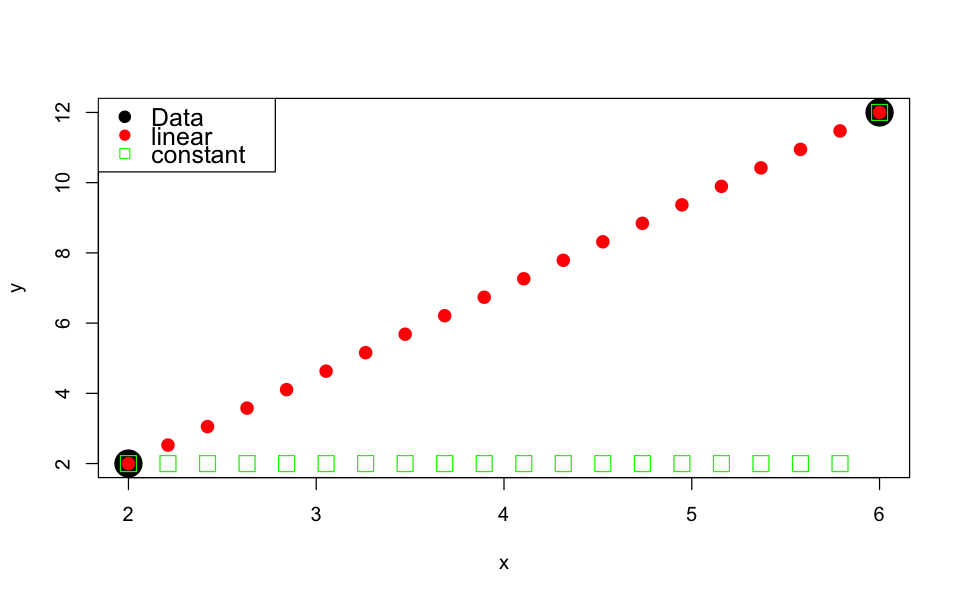

In [62]:
plot(x, y, pch = 19, cex = 3)

points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)

points(interp_pts_constant, col = 'green2', pch = 22, cex = 2)

legend(x="topleft", c("Data", "linear", "constant"), pch=c(19, 16, 22),
       col=c("black", "red", "green"), bg="white", cex = 1.25)

### Interpolation representation by using all points between known points `(x0, y0) and (x1, y1)`  and both method as line representation.

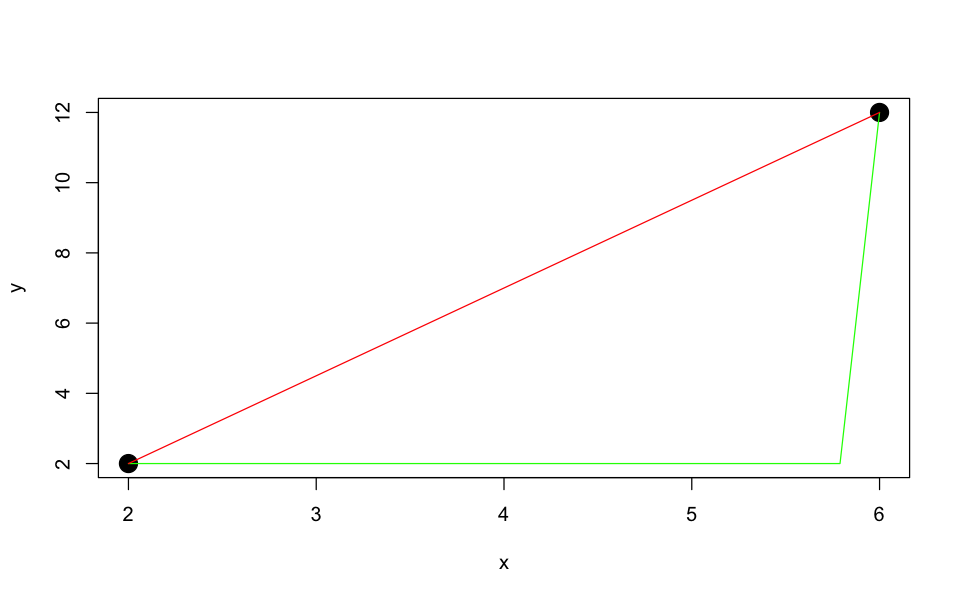

In [63]:
plot(x, y, pch = 19, cex = 2)
lines(interp_pts_constant, col = 'green')

lines(interp_pts_linear, col = 'red')

### Interpolation at specific point i.e at specific index

In [68]:
estimate_value  <- approx(x, y, xout = 3.8)

estimate_value

$x
[1] 3.8

$y
[1] 6.5

### Graphically representaton of interpolation at specific point i.e at specific index

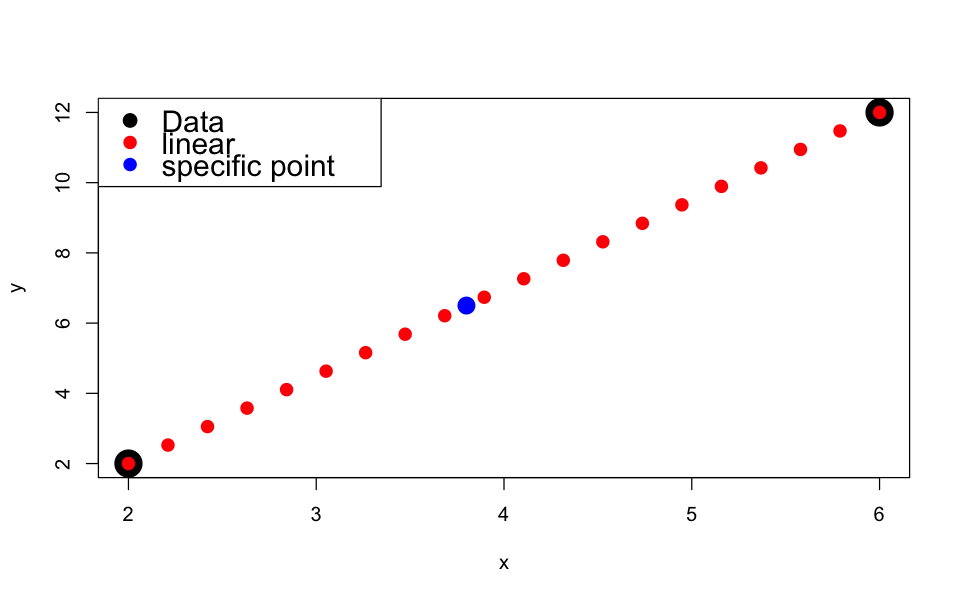

In [69]:
plot(x, y, pch = 19, cex = 3)
points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)
points(approx(x, y, xout = estimate_value$x), col = 'blue', cex = 2, pch = 16)

legend(x="topleft", c("Data", "linear", "specific point"), pch=c(19, 16, 16),
       col=c("black", "red", "blue"), bg="white", cex = 1.5)

### Extrapolation

https://stackoverflow.com/questions/15535877/extrapolate-in-r-for-a-time-series-data

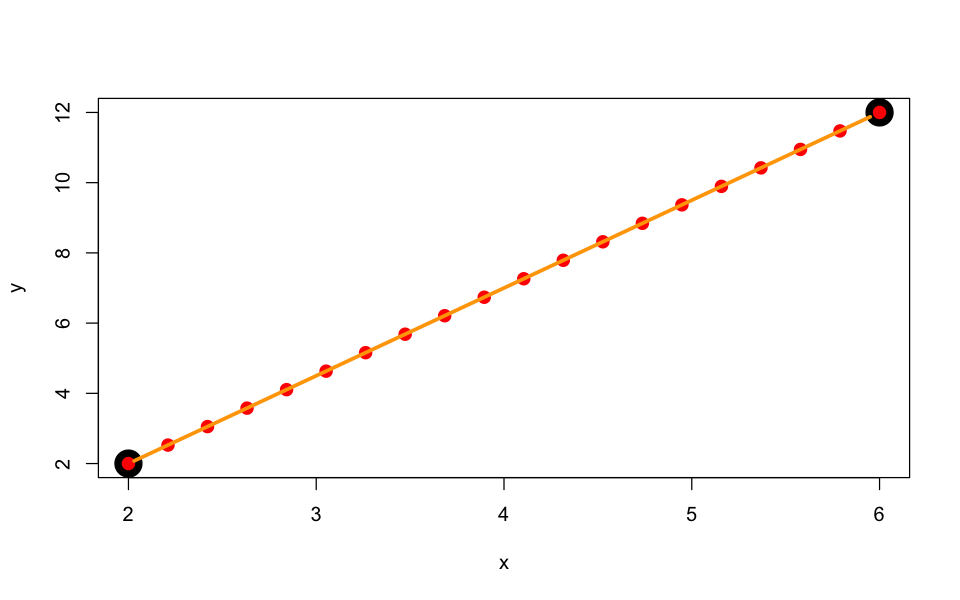

In [70]:
plot(x, y, pch = 19, cex = 3)
points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)

plot(approxfun(x, y, rule = 1), 0, 7, , pch = 22, col = "orange", add = TRUE,  lwd = 3)

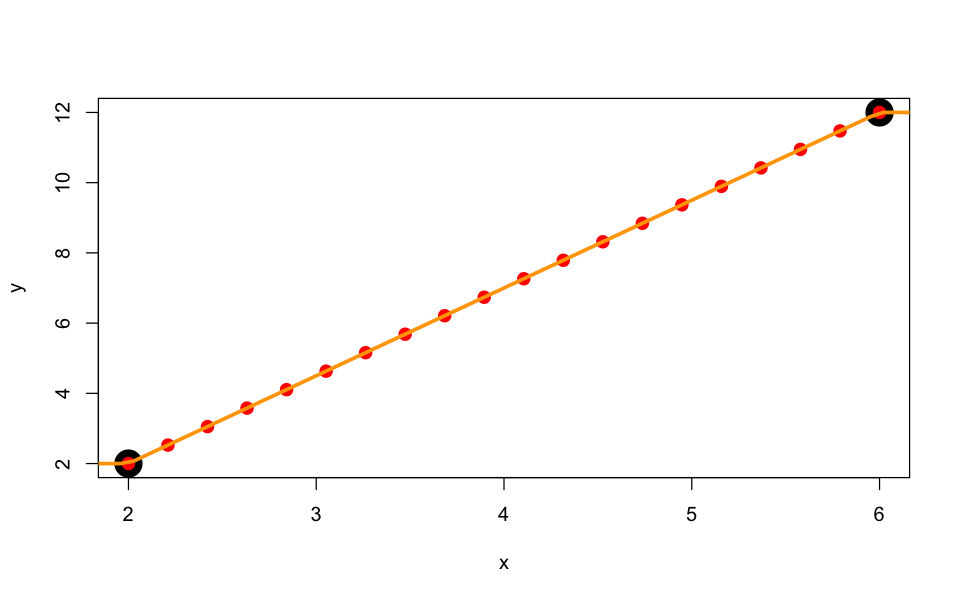

In [71]:
plot(x, y, pch = 19, cex = 3)
points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)

plot(approxfun(x, y, rule = 2), 0, 7, , pch = 22, col = "orange", add = TRUE,  lwd = 3)

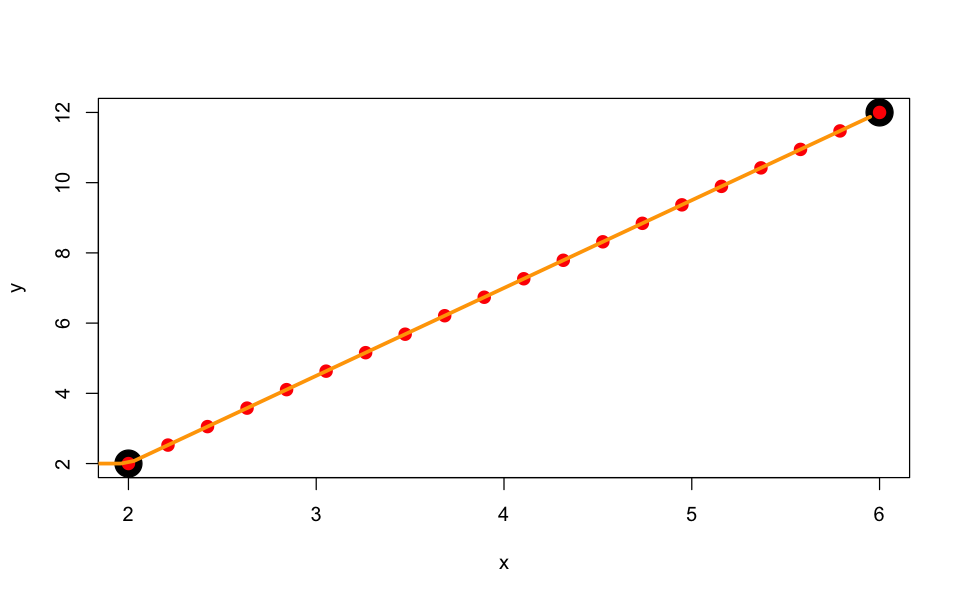

In [72]:
plot(x, y, pch = 19, cex = 3)
points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)

plot(approxfun(x, y, rule = 2:1), 0, 7, , pch = 22, col = "orange", add = TRUE,  lwd = 3)

__Note__:- In above code `rule = 2:1` denote as left extrapolation

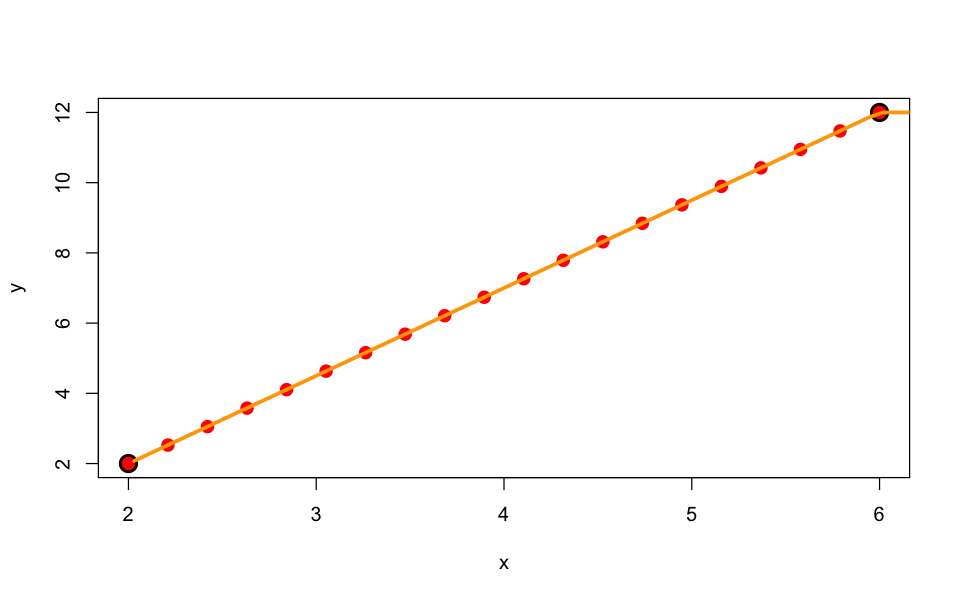

In [73]:
plot(x, y, pch = 19, cex = 2)
points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)


plot(approxfun(x, y, rule = 1:2 ), 0, 7, , pch = 22, col = "orange", add = TRUE,  lwd = 3)

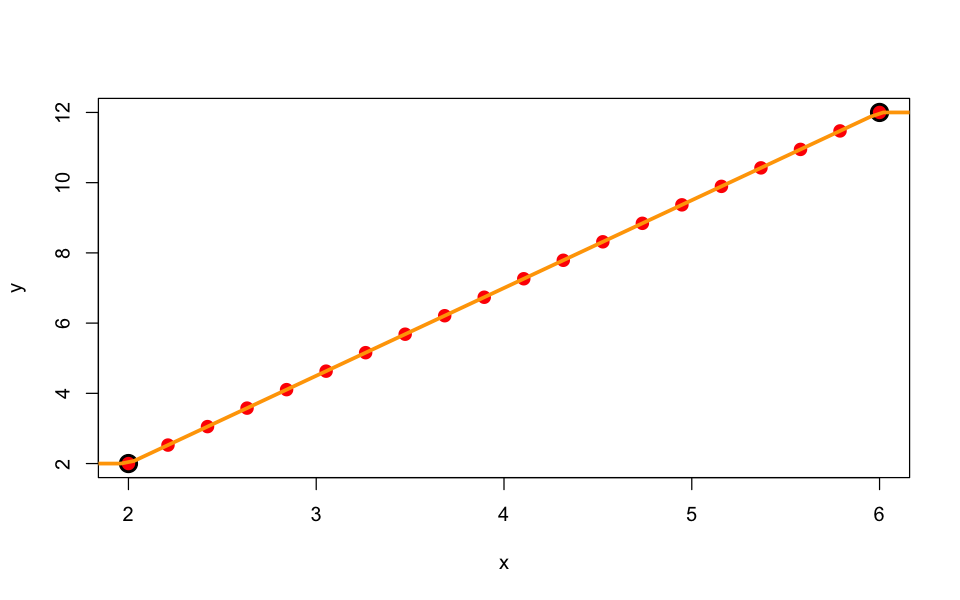

In [75]:
plot(x, y, pch = 19, cex = 2)
points(interp_pts_linear, col = 'red', pch = 16, cex = 1.5)


plot(approxfun(x, y, rule = 2:2 ), 0, 7, , pch = 22, col = "orange", add = TRUE,  lwd = 3)

__Note__:- In above code `rule = 2:2` denote as both side extrapolation

### Polynomial interpolation

https://rpubs.com/aaronsc32/lagrangian-polynomial-interpolation-r

https://www.rdocumentation.org/packages/polynom/versions/1.4-0/topics/poly.calc

### Create dataframe

In [110]:
x <- c(-3, -2, -1, 0, 1, 2, 3)

y <- c(-33, -9, -1.5, 2, 5, 12, 36)

data_points <- data.frame(cbind(x, y))

head(data_points, 10)

x,y
-3,-33.0
-2,-9.0
-1,-1.5
0,2.0
1,5.0
2,12.0
3,36.0


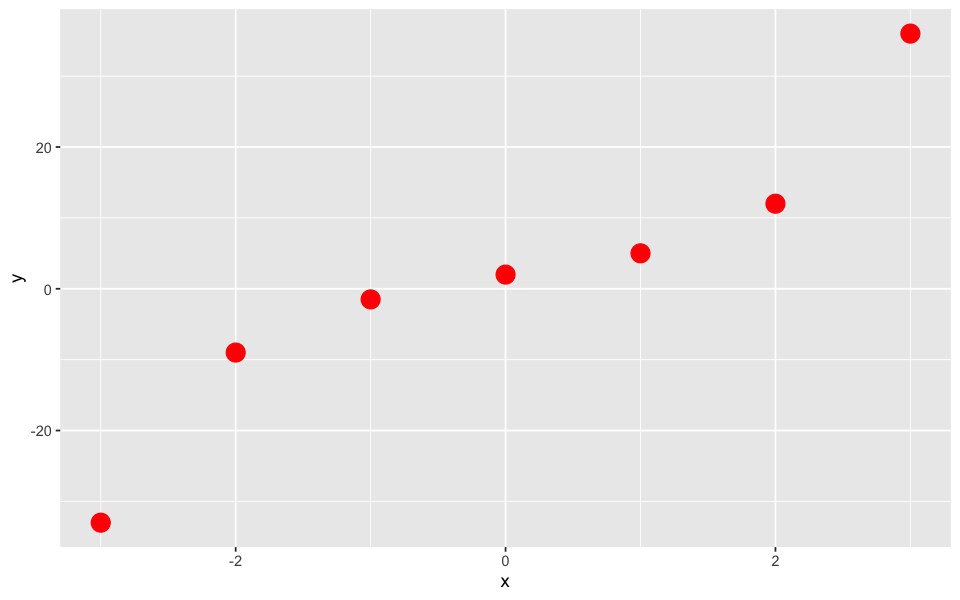

In [111]:
ggplot(data_points, aes(x = x, y = y)) +
geom_point(size = 5, col = 'red') 

### Find polynomial function by using data points

In [112]:
poly_values <- poly.calc(x, y)
poly_values

2 + 2.875*x - 0.3055556*x^2 + 0.3020833*x^3 + 0.05902778*x^4 + 0.07291667*x^5 -  
0.003472222*x^6 

### Visualization of Intrapolation using `stat function`
Note:- Here all data points between a(-3, -27) abd b(3, 27) are denoted by green line.

In [113]:
poly_fun <- function(x){
    return (2 + 2.875*x - 0.3055556*x^2 + 0.3020833*x^3 + 0.05902778*x^4 + 0.07291667*x^5 - 0.003472222*x^6)
}

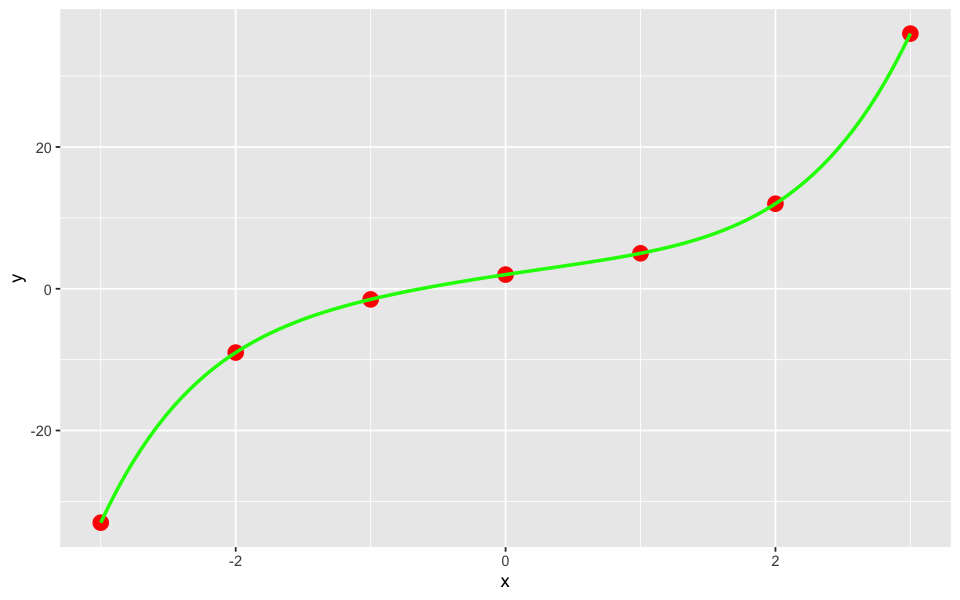

In [114]:
ggplot(data_points, aes(x = x, y = y)) + 
    geom_point(size = 4, col = 'red') + 
    stat_function(fun = poly_fun, col = 'green', size = 1, alpha = 1)

### Extrapolation

https://stackoverflow.com/questions/15535877/extrapolate-in-r-for-a-time-series-data

### Extrapolation 
Note:- In extrapolation we are try to find all data points out of the range given i.e(-3, 3)

In [121]:
expected_data <- data.frame(x = 3:6)

expected_data

x
3
4
5
6


### Expected `y` values in the format of `y = x^3`.

In [122]:
expected_data$y <- predict(lm(y ~ poly_fun(x), data = data_points), newdata = expected_data)

expected_data

x,y
3,36.0
4,103.5
5,257.0
6,555.0


### Extrapolation of of the polynomial function.

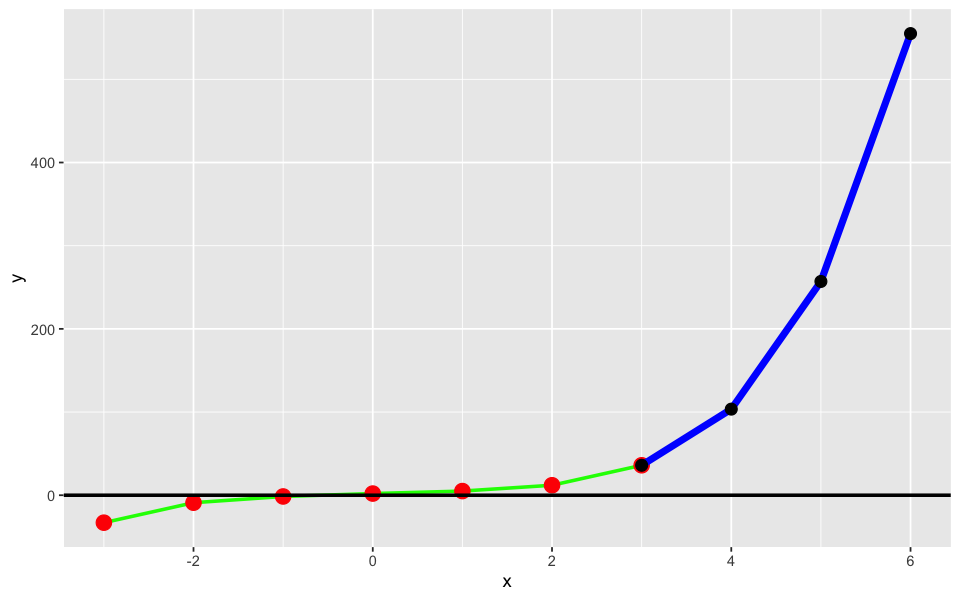

In [123]:
actual_points_graph + 
geom_line(col = 'blue', data = expected_data, size = 2) +
geom_point(col = 'black', data = expected_data, size = 3)

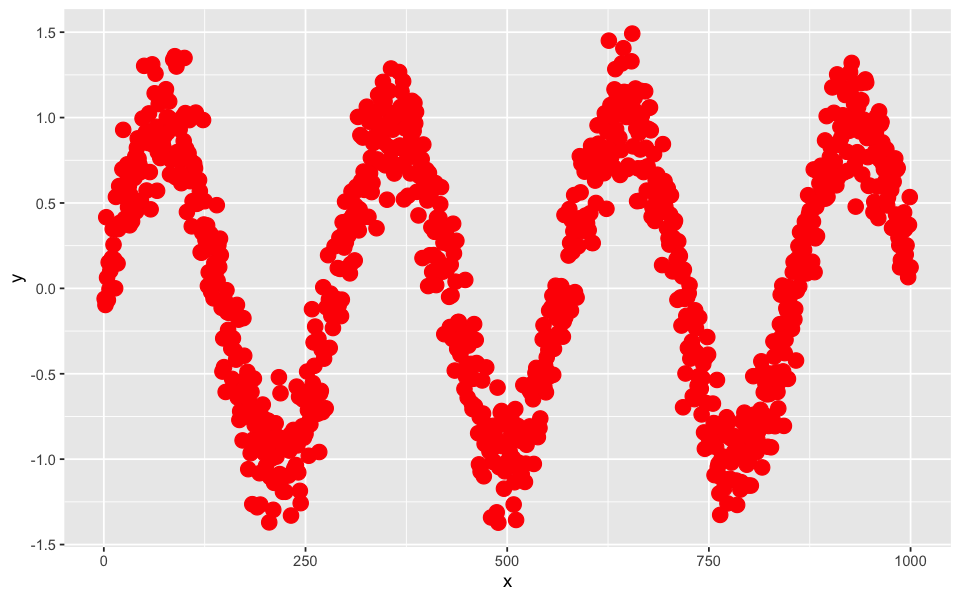

In [146]:
num <- 1e3

sine_data <- data.frame(
  x = 1:num,
  y = sin(seq(0, 7*pi, length.out = num)) + rnorm(n=num, mean = 0, sd=0.2)
)

ggplot(sine_data, aes(x = x, y = y)) + 
    geom_point(size = 4, col = 'red')

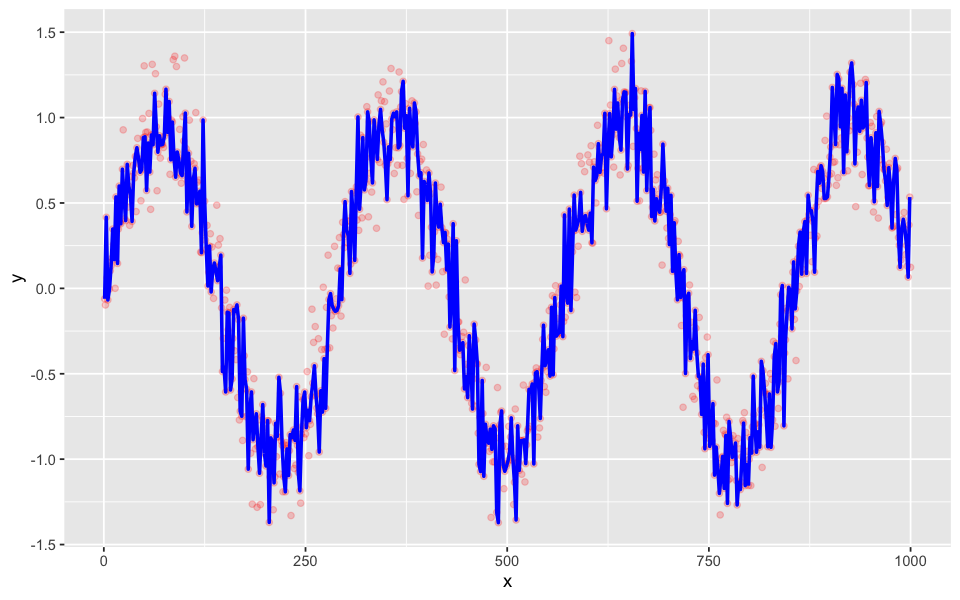

In [153]:
approx_data <- data.frame(
  with(sine_data, 
       approx(x, y, xout = seq(1, num, by = 2), method = "linear")
  ),
  method = "approx()"
)

ggplot(approx_data, aes(x = x, y = y)) + 
    geom_point(dat = sine_data, aes(x, y), alpha = 0.2, col = "red") +
    geom_line(size = 1, col = 'blue')

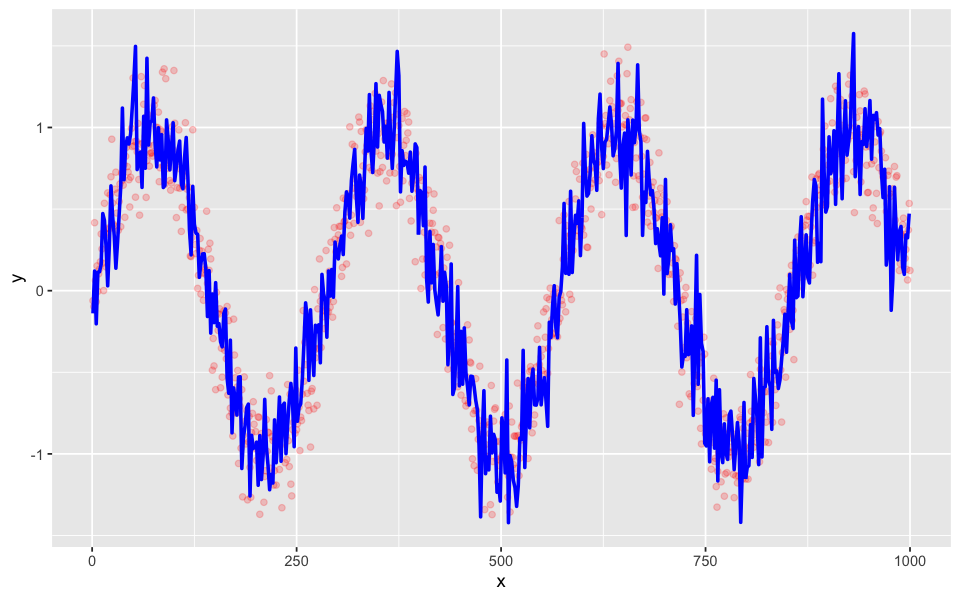

In [154]:
spline_data <- data.frame(
  with(dat, 
       spline(x, y, xout = seq(1, num, by = 2))
  ),
  method = "spline()"
)

ggplot(spline_data, aes(x = x, y = y)) + 
    geom_point(dat = sine_data, aes(x, y), alpha = 0.2, col = "red") +
    geom_line(size = 1, col = 'blue')

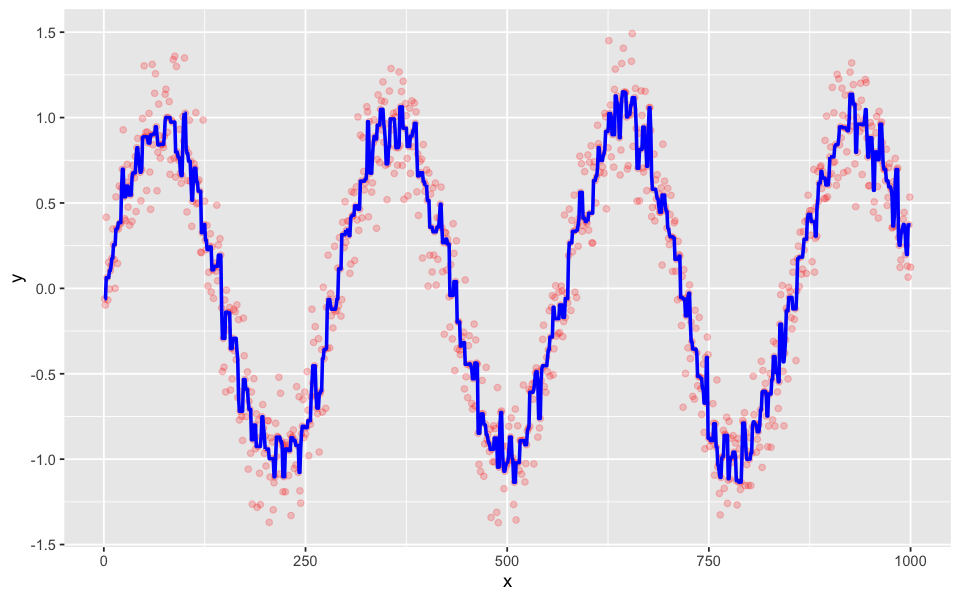

In [155]:
smooth_data <- data.frame(
  x = 1:num,
  y = as.vector(smooth(sine_data$y)),
  method = "smooth()"
)

ggplot(smooth_data, aes(x = x, y = y)) + 
    geom_point(dat = sine_data, aes(x, y), alpha = 0.2, col = "red") +
    geom_line(size = 1, col = 'blue')